In [1]:
from modules.cosmology import cosmo_fn
from data_preprocess import preprocess_planck_data as ppd
from settings import mmf_settings as mmfset
from astropy.io import fits
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
mmf_cat=ppd.get_tangent_plane_fnames()
mmf_cat=ppd.eval_M500_T500_theta500(mmf_cat)

In [39]:
snr0mmf3=np.zeros(np.size(mmf_cat["NAME"]),float)
yc0mmf3=np.zeros(np.size(mmf_cat["NAME"]),float)
snrTmmf3=np.zeros(np.size(mmf_cat["NAME"]),float)
ycTmmf3=np.zeros(np.size(mmf_cat["NAME"]),float)
for idx,clstrname in enumerate(mmf_cat["NAME"]):
    filename=mmfset.paths["result_data"] + "mmf3par_" + clstrname[5:] + ".fits"
    f1=fits.open(filename)
    snr0mmf3[idx]=f1[1].data[3]
    yc0mmf3[idx]=f1[1].data[4]
    snrTmmf3[idx]=f1[3].data[3]
    ycTmmf3[idx]=f1[3].data[4]
    f1.close()

<IPython.core.display.Javascript object>


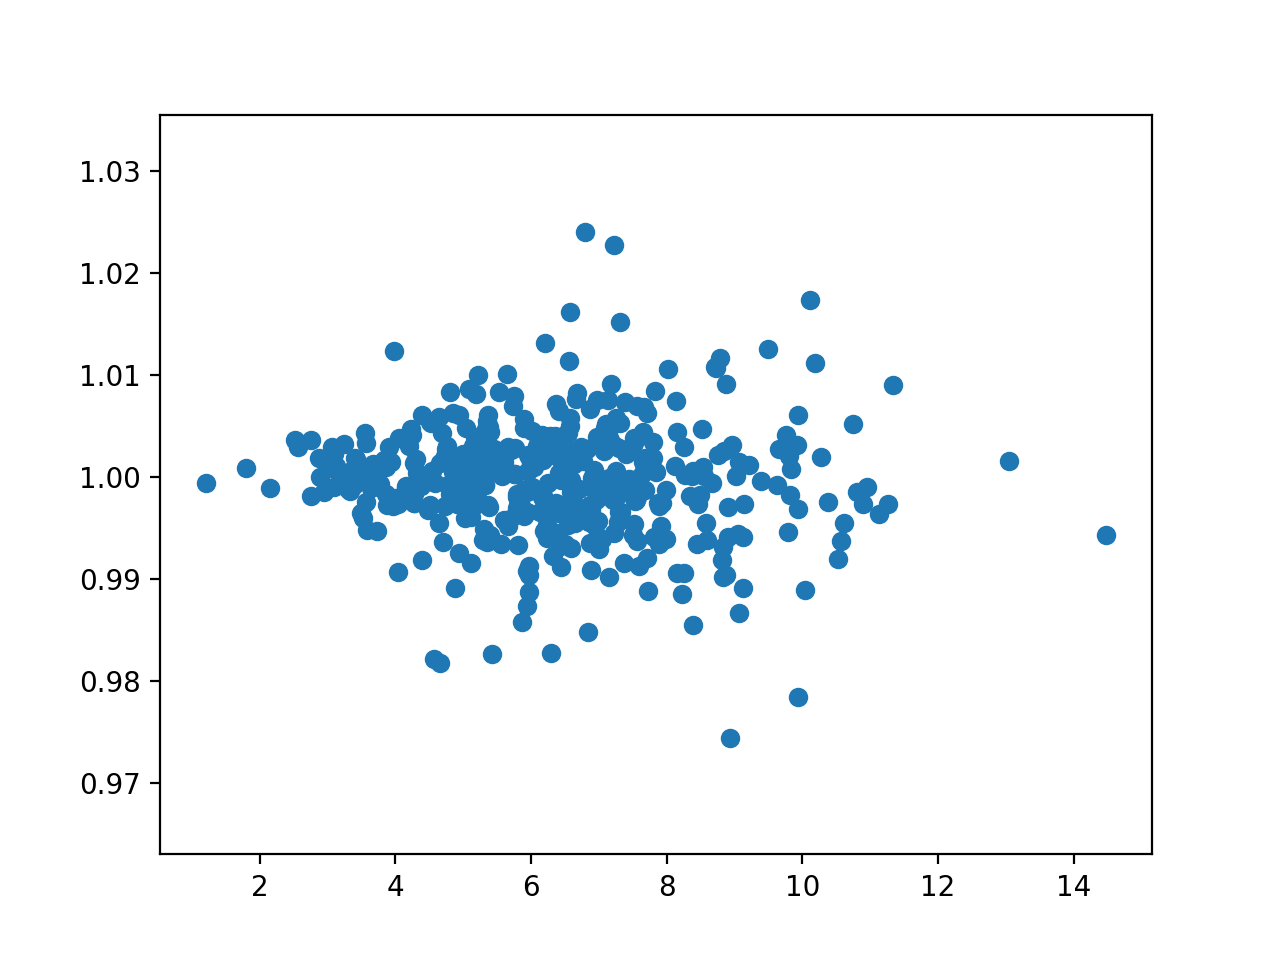

<IPython.core.display.Javascript object>


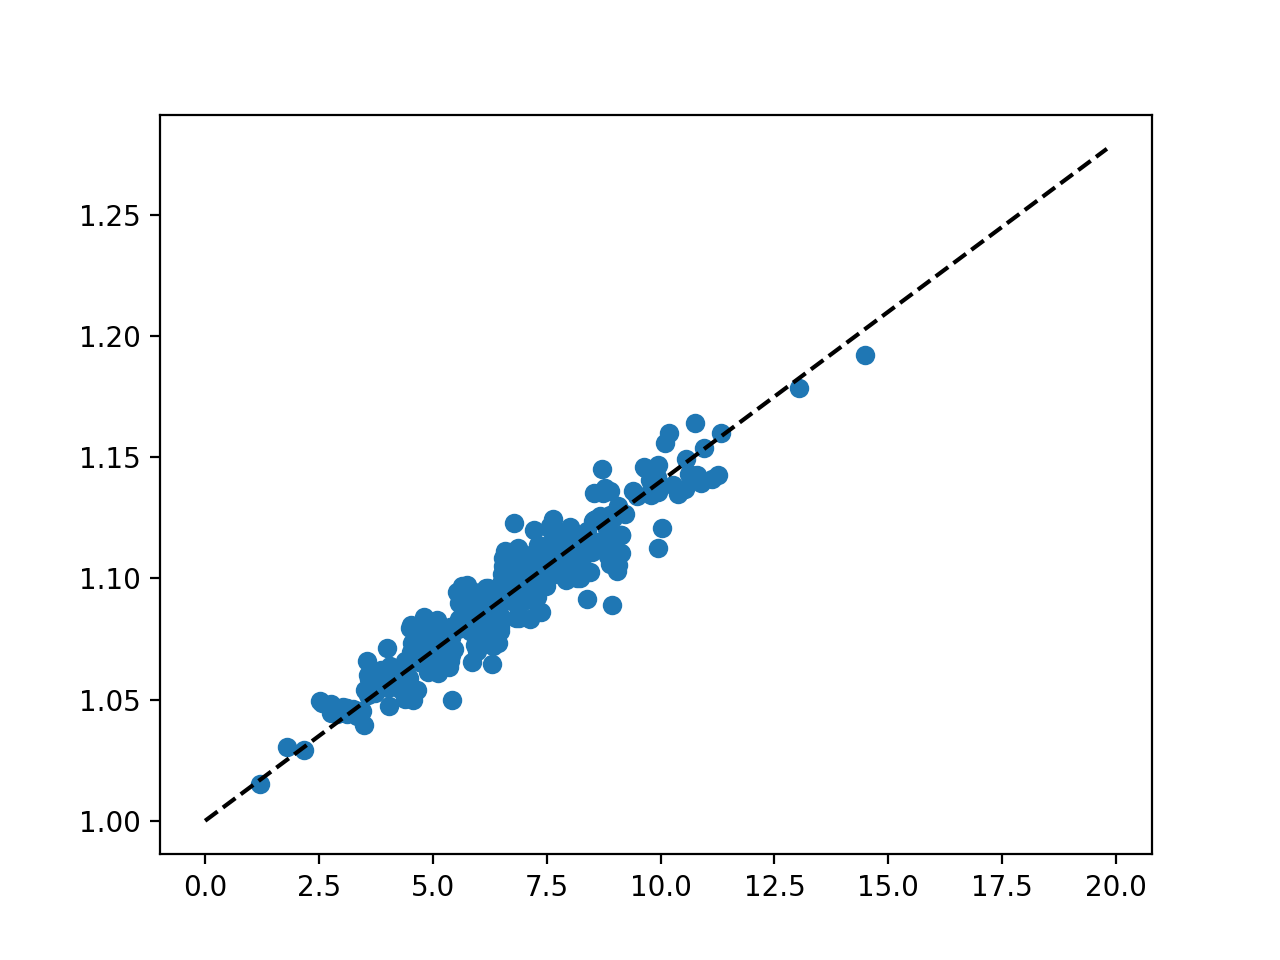

In [40]:
x=arange(0,50,0.1)
figure()
#plot(x,x,"k-")
scatter(mmf_cat["T500"],snrTmmf3/snr0mmf3)

T500=arange(0,20,0.2)
figure()
plot(T500,1+0.07*T500/5.,"k--")
scatter(mmf_cat["T500"],ycTmmf3/yc0mmf3)

In [147]:
snr0=np.zeros(np.size(mmf_cat["NAME"]),float)
yc0=np.zeros(np.size(mmf_cat["NAME"]),float)
otheta500=np.zeros(np.size(mmf_cat["NAME"]),float)
snrT=np.zeros(np.size(mmf_cat["NAME"]),float)
ycT=np.zeros(np.size(mmf_cat["NAME"]),float)
clT500=np.zeros(np.size(mmf_cat["NAME"]),float)
for idx,clstrname in enumerate(mmf_cat["NAME"]):
    filename=mmfset.paths["result_data"] + "otheta500_" + clstrname[5:] + ".fits"
    f1=fits.open(filename)
    snr0[idx]=f1[1].data[3]
    yc0[idx]=f1[1].data[4]
    otheta500[idx]=f1[1].data[0]
    f1.close()
    filename=mmfset.paths["result_data"] + "oT500_" + clstrname[5:] + ".fits"
    f1=fits.open(filename)
    clT500[idx]=f1[1].data[1]
    snrT[idx]=f1[1].data[3]
    ycT[idx]=f1[1].data[4]
#     filename=mmfset.paths["result_data"] + "otheta500_mmf3T500_" + clstrname[5:] + ".fits"
#     f1=fits.open(filename)
#     snrT[idx]=f1[1].data[3]
#     ycT[idx]=f1[1].data[4]
    f1.close()

In [137]:
f1[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    1 / number of array dimensions                     
NAXIS1  =                    6                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
EXTNAME = 'Result  '                                                            
COMMENT theta500, T, y_c err, SNR, y_c, Conv. to Y err                          

<IPython.core.display.Javascript object>


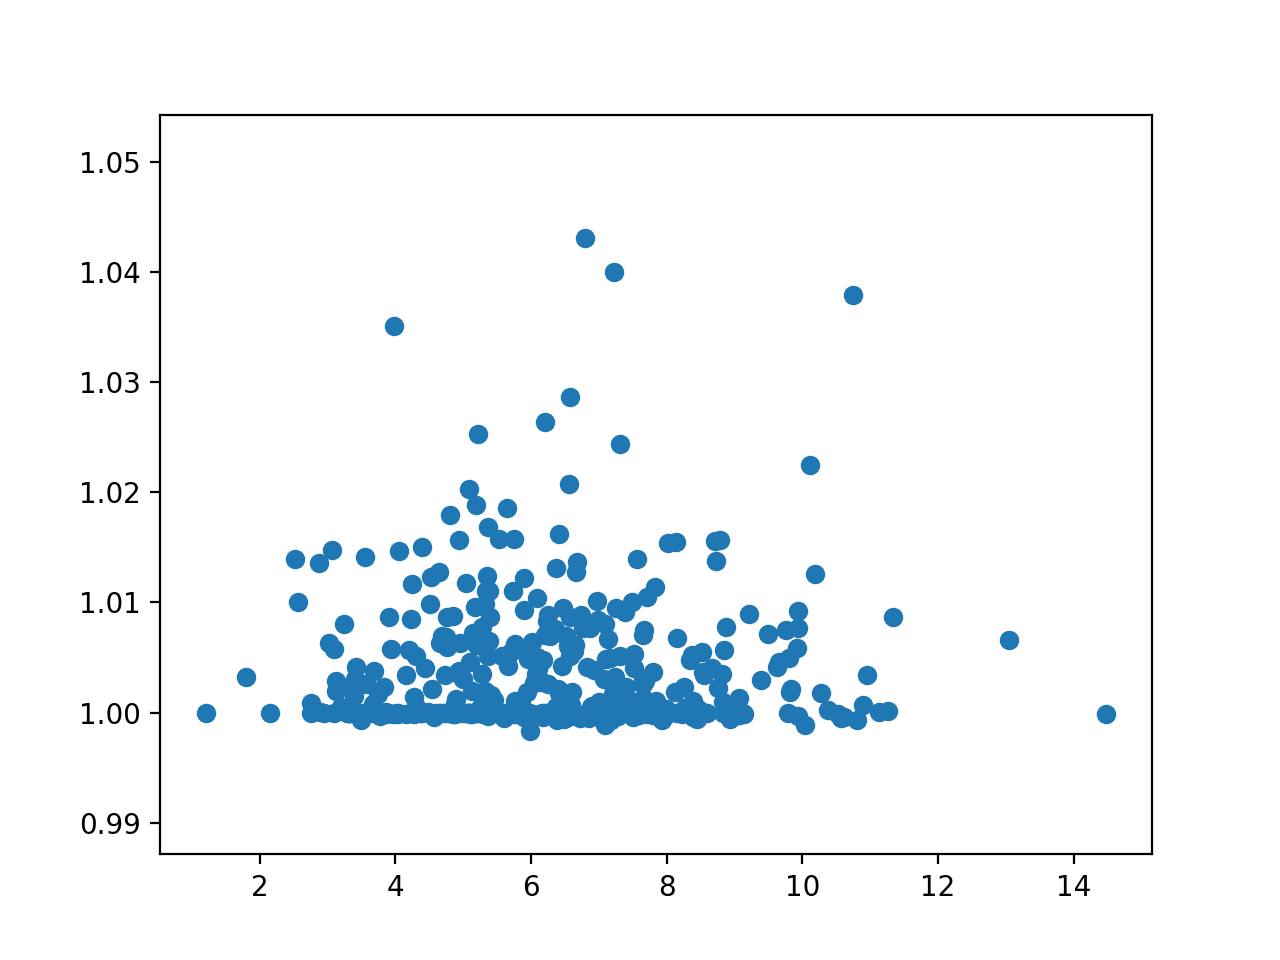

<IPython.core.display.Javascript object>


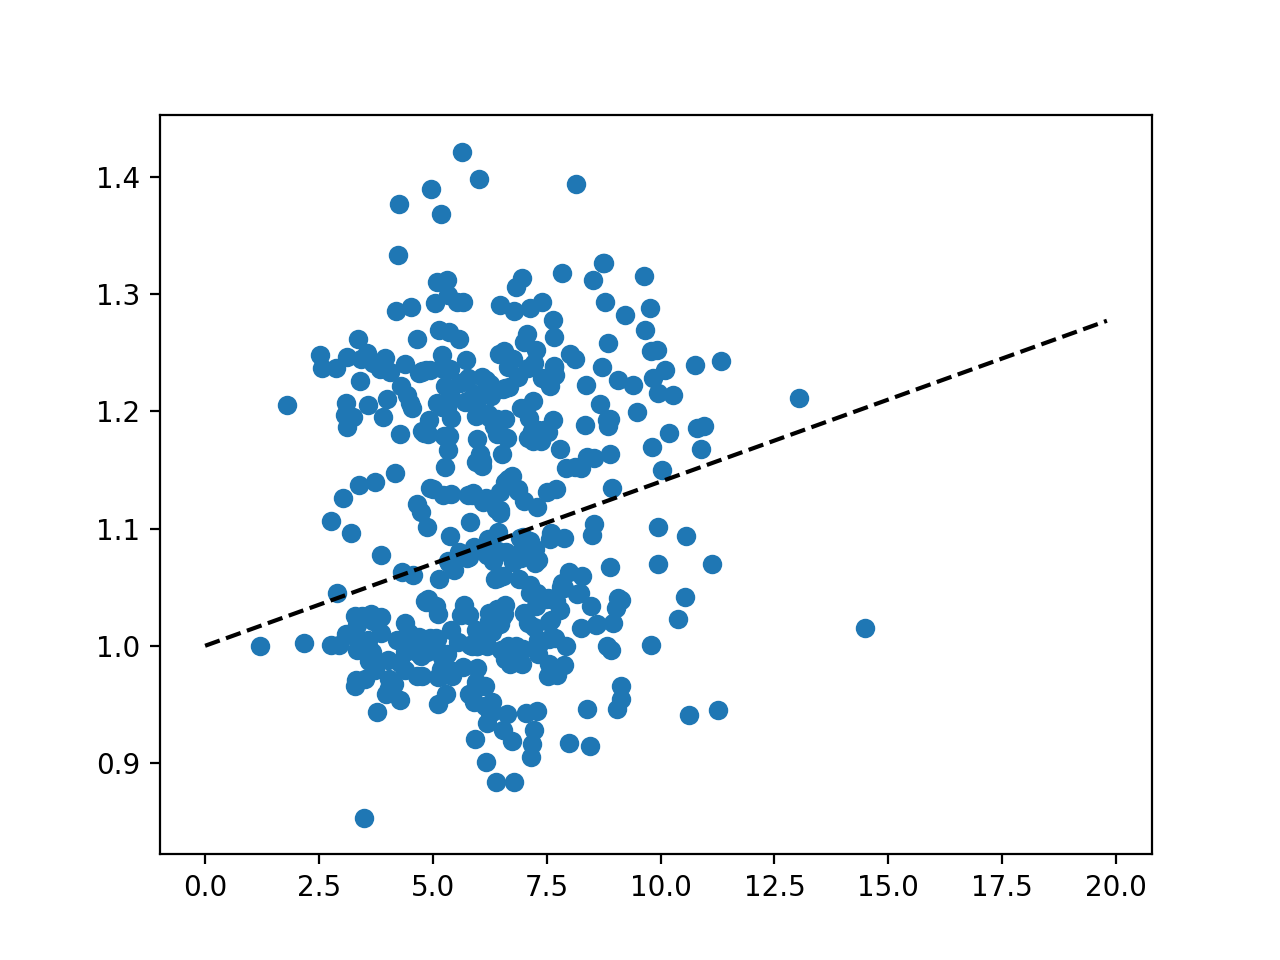

In [148]:
T500=arange(0,20,0.2)

figure()
#plot(T500,1+0.07*T500/5.,"k--")
scatter(mmf_cat["T500"],snrT/snr0)

figure()
plot(T500,1+0.07*T500/5.,"k--")
scatter(mmf_cat["T500"],ycT/yc0)

In [61]:
skyfracs=loadtxt("../data/Planck/COM_PCCS_SZ-Catalogs_vPR2/SZ_skyfracs.txt")
ylims=loadtxt("../data/Planck/COM_PCCS_SZ-Catalogs_vPR2/SZ_ylims.txt")
thetas=loadtxt("../data/Planck/COM_PCCS_SZ-Catalogs_vPR2/SZ_thetas.txt")

sig=np.zeros((np.size(skyfracs),np.size(thetas)),float)
cnt_patch=1
cnt_thetas=1
for i in range(np.size(ylims)):
    sig[cnt_patch-1,cnt_thetas-1]=ylims[i]
    cnt_patch=cnt_patch+1
    if cnt_patch>np.size(skyfracs):
        cnt_patch=1
        cnt_thetas=cnt_thetas+1

In [6]:
clstrname=mmf_cat["NAME"][183]
filename=mmfset.paths["result_data"] + "otheta500_" + clstrname[5:] + ".fits"
f1=fits.open(filename)

theta500=f1[2].data
Yerr=np.zeros((np.size(mmf_cat["NAME"]),np.size(theta500)),float)
for idx,clstrname in enumerate(mmf_cat["NAME"]):
    filename=mmfset.paths["result_data"] + "otheta500_" + clstrname[5:] + ".fits"
    f1=fits.open(filename)
    Yerr[idx,:]=f1[3].data[0,]*f1[3].data[3,]
    f1.close()

<IPython.core.display.Javascript object>


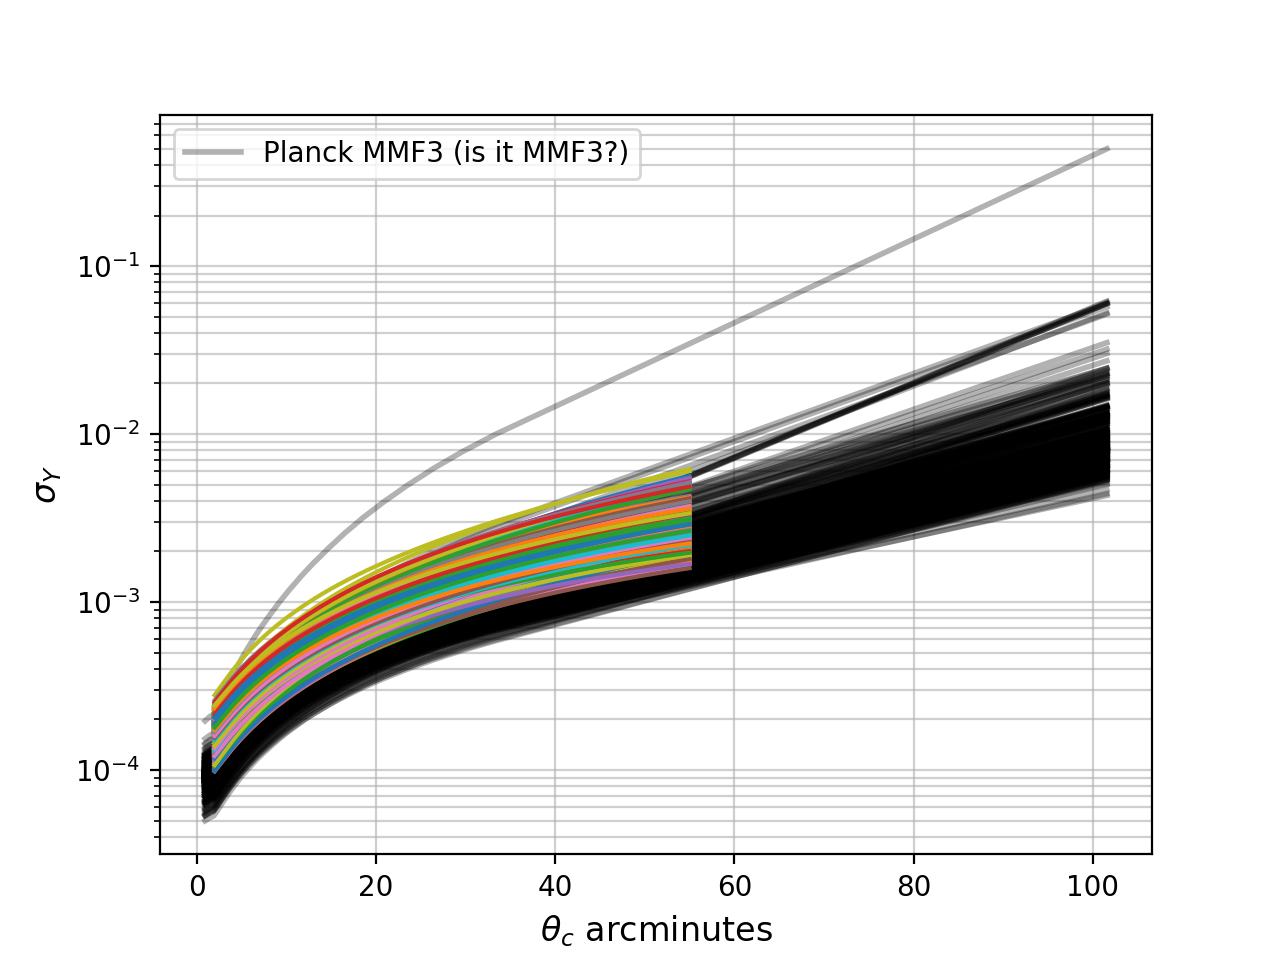

In [63]:
figure()
for i in range(np.size(skyfracs)):
    if i==0:
        plot(thetas,sig[i,:],"k-",lw=2,alpha=0.3,label="Planck MMF3 (is it MMF3?)")
    else:
        plot(thetas,sig[i,:],"k-",lw=2,alpha=0.3)
        
for idx,clstrname in enumerate(mmf_cat["NAME"]):
    plot(theta500,Yerr[idx,])
legend(loc=0)
semilogy()
grid(alpha=0.6,which="both")
ylabel("$\sigma_Y$",fontsize=12)
xlabel(r"$\theta_c$ arcminutes",fontsize=12)
# filename=mmfset.paths["result_figs"] + "compare_Yerr.pdf"
# savefig(filename,bbox_inches="tight")

In [9]:
clstrname=mmf_cat["NAME"][183]
filename=mmfset.paths["result_data"] + "cgrid_" + clstrname[5:] + ".fits"
f1=fits.open(filename)

In [138]:
snrc=np.zeros(np.size(mmf_cat["NAME"]),float)
ycc=np.zeros(np.size(mmf_cat["NAME"]),float)
ctheta500=np.zeros(np.size(mmf_cat["NAME"]),float)
for idx,clstrname in enumerate(mmf_cat["NAME"]):
    filename=mmfset.paths["result_data"] + "cgrid_" + clstrname[5:] + ".fits"
    f1=fits.open(filename)
    snrc[idx]=f1[1].data[3]
    ycc[idx]=f1[1].data[4]
    ctheta500[idx]=f1[1].data[0]
    f1.close()

<IPython.core.display.Javascript object>


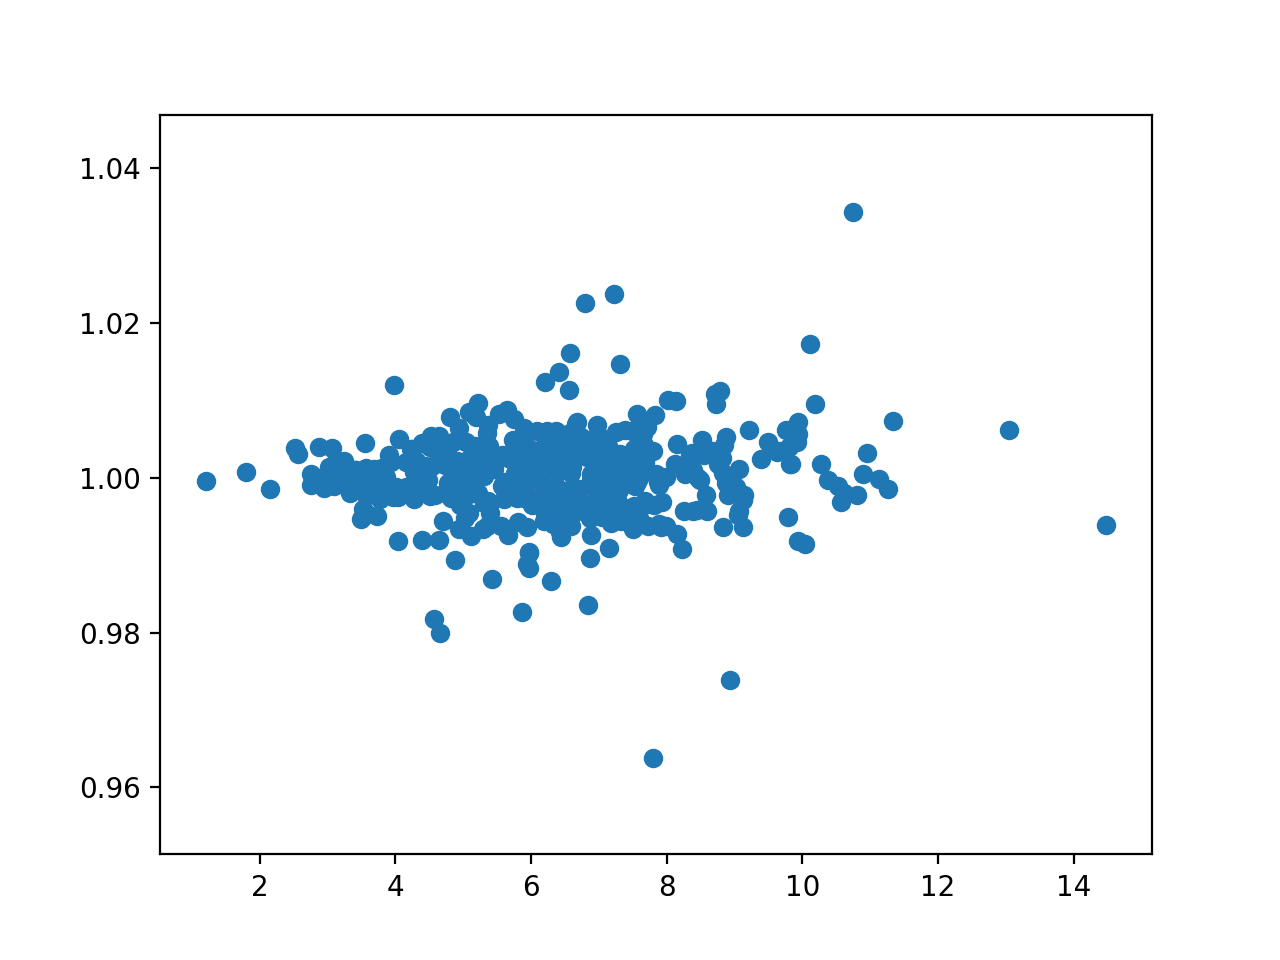

In [146]:
T500=arange(0,20,0.2)

figure()
#plot(x,x,"k-")
scatter(mmf_cat["T500"],snrT/snr0)
#plot(T500,1+0.07*T500/5.,"k--")

In [128]:
idx=400
print snrT[idx]
print snr0[idx]
print mmf_cat["SNR"][idx]

6.71487756694
6.77062865595
6.02785


In [144]:
idx=4
clstrname=mmf_cat["NAME"][idx]
filename=mmfset.paths["result_data"] + "otheta500_" + clstrname[5:] + ".fits"
f1=fits.open(filename)
filename=mmfset.paths["result_data"] + "cgrid_" + clstrname[5:] + ".fits"
f2=fits.open(filename)

<IPython.core.display.Javascript object>


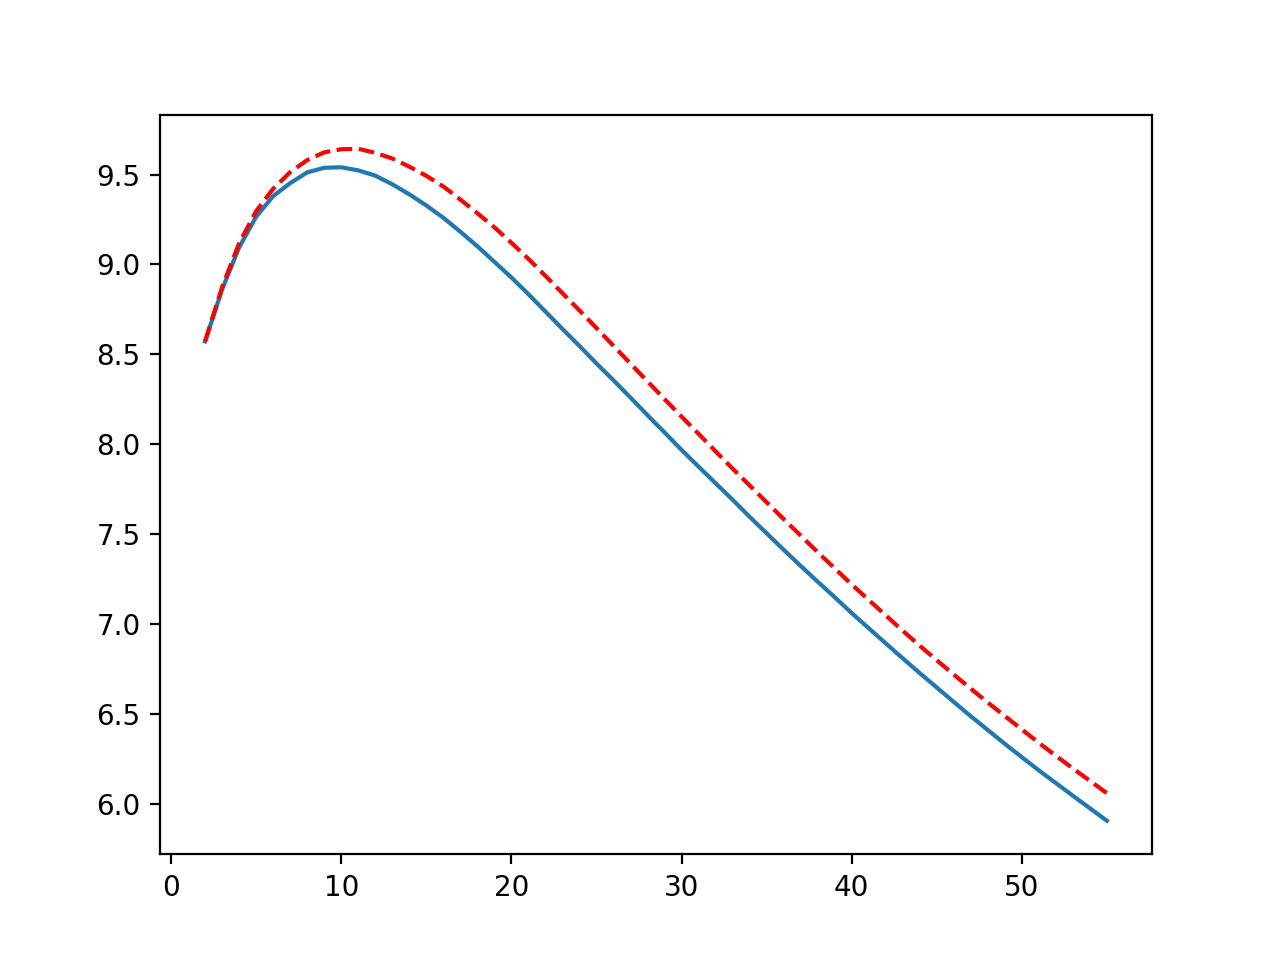

In [145]:
figure()
plot(f1[2].data,f1[3].data[1,])
plot(f2[2].data,f2[4].data[1,],"r--")

In [132]:
print f2[1].data[3,],snrc[idx]
print f1[1].data[3,],snr0[idx]

6.62678775273 6.62678775273
6.77062865595 6.77062865595


<IPython.core.display.Javascript object>


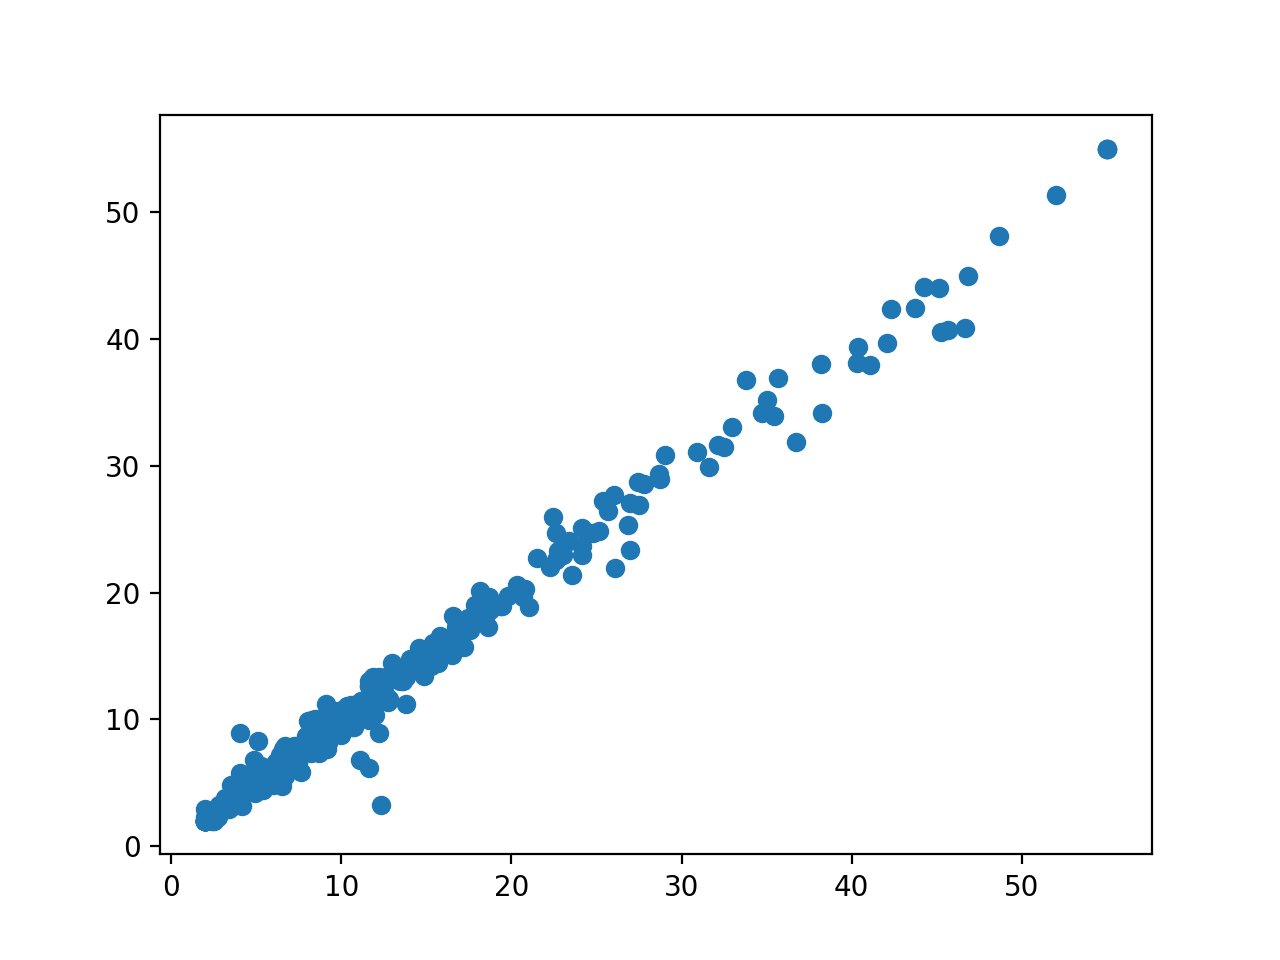

In [141]:
figure()
scatter(otheta500,ctheta500)